In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler

In [67]:
train = pd.read_csv('../csv/train.csv')
test = pd.read_csv('../csv/test.csv')

In [68]:
# 전처리 전, 하나의 데이터프레임으로 합치기
all_df = pd.concat([train,test],sort=False).reset_index(drop=True)
all_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN


In [69]:
# id와 목적변수 제거
all_df = all_df.drop(columns=['id','NObeyesdad'],axis=1)
all_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [70]:
all_df.info()
# null값 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          34598 non-null  object 
 1   Age                             34598 non-null  float64
 2   Height                          34598 non-null  float64
 3   Weight                          34598 non-null  float64
 4   family_history_with_overweight  34598 non-null  object 
 5   FAVC                            34598 non-null  object 
 6   FCVC                            34598 non-null  float64
 7   NCP                             34598 non-null  float64
 8   CAEC                            34598 non-null  object 
 9   SMOKE                           34598 non-null  object 
 10  CH2O                            34598 non-null  float64
 11  SCC                             34598 non-null  object 
 12  FAF                             

In [71]:
# 수치형 변수 요약
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000


In [72]:
# 범주형 변수 요약
all_df.describe(include='object').T

,count,unique,top,freq
Gender,34598,2,Female,17387
family_history_with_overweight,34598,2,yes,28398
FAVC,34598,2,yes,31565
CAEC,34598,4,Sometimes,29218
SMOKE,34598,2,no,34173
SCC,34598,2,no,33447
CALC,34598,4,Sometimes,25045
MTRANS,34598,5,Public_Transportation,27798


* 수치형 변수_시각화

C:\Users\dldkr\AppData\Local\Temp\ipykernel_17688\167327582.py:24: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\dldkr\AppData\Local\Temp\ipykernel_17688\167327582.py:24: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
C:\Users\dldkr\AppData\Local\Temp\ipykernel_17688\167327582.py:24: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  plt.tight_layout()
C:\Users\dldkr\AppData\Local\Temp\ipykernel_17688\167327582.py:24: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
C:\Users\dldkr\AppData\Local\Temp\ipykernel_17688\167327582.py:24: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
c:\Users\dldkr\anaconda3\envs\envFirstMini\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  

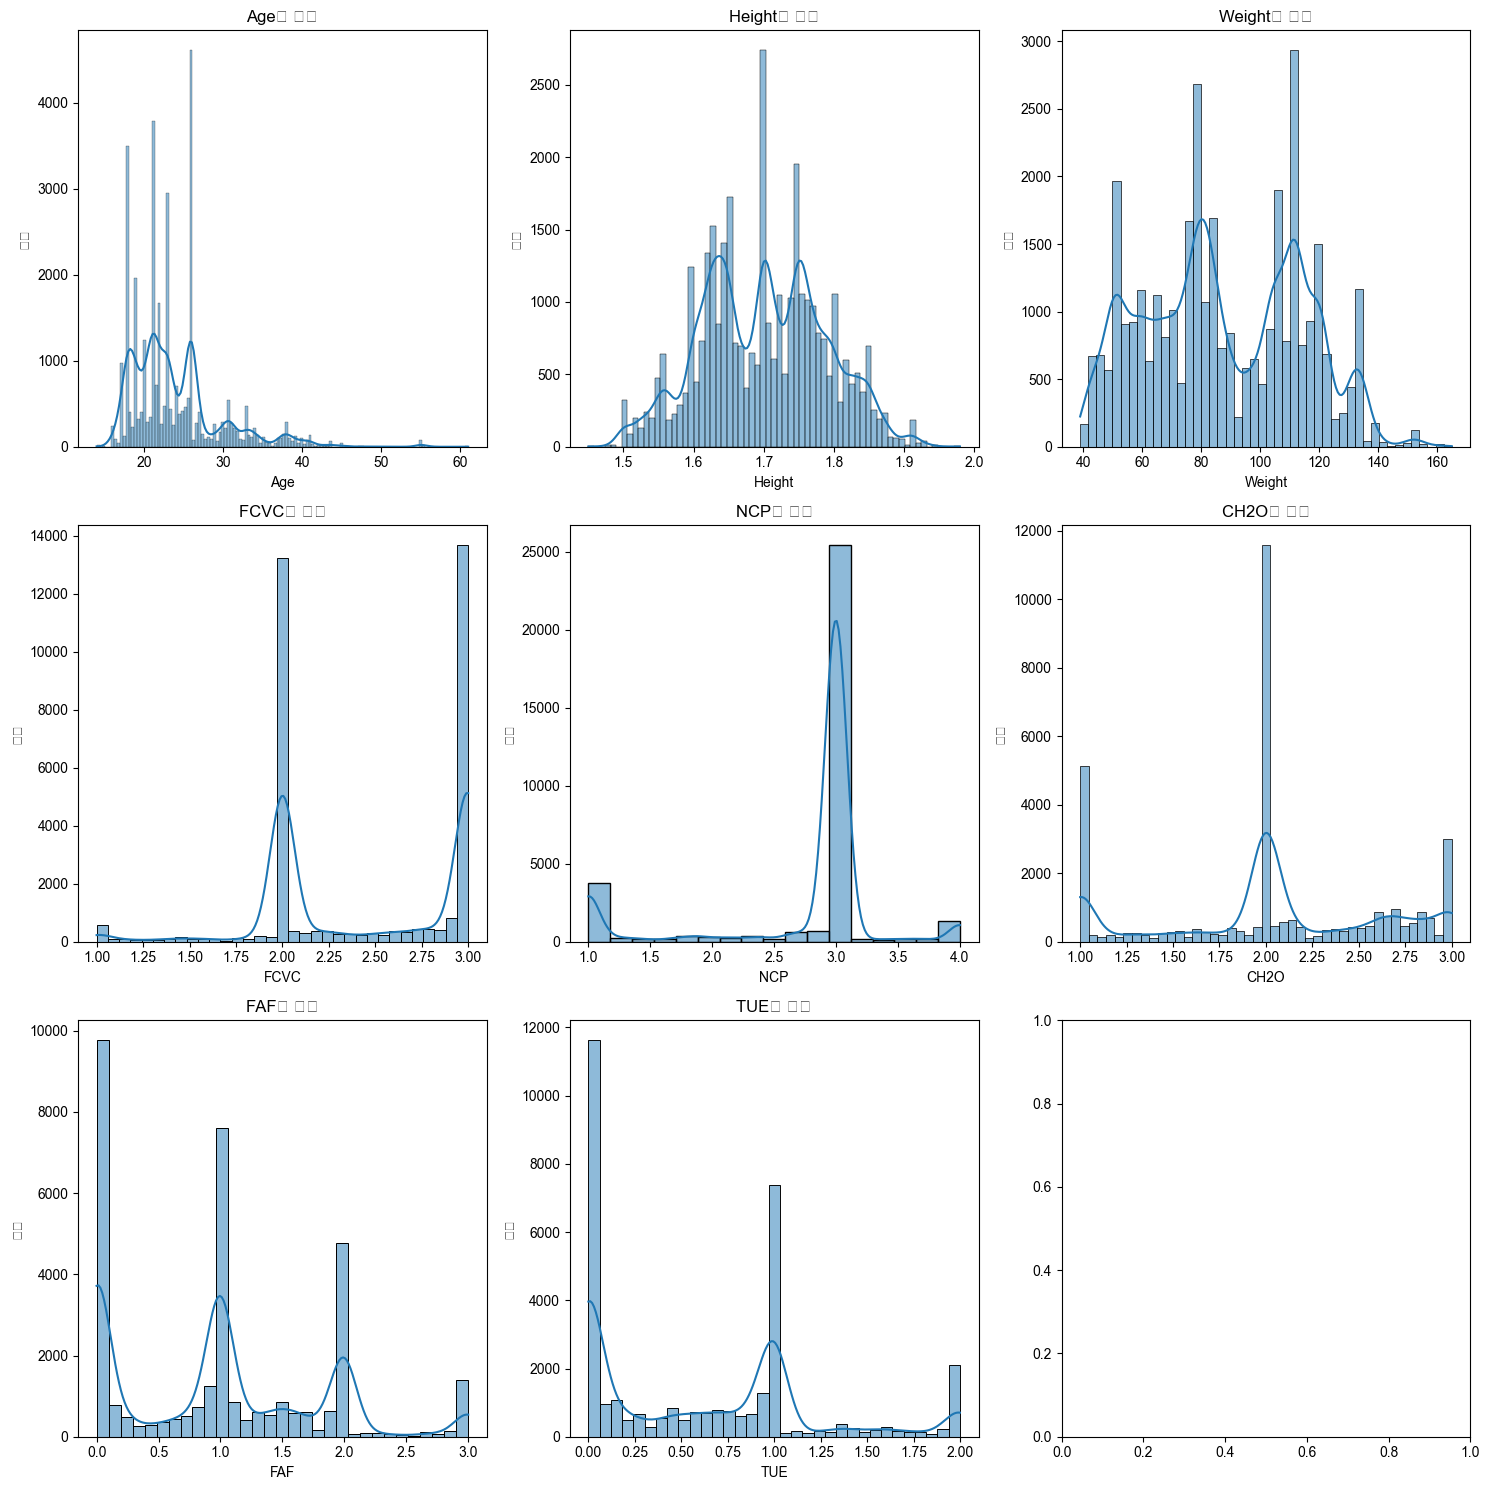

In [73]:
# 분포 시각화

# 수치형 변수 열 선택
numeric_columns = all_df.select_dtypes(include=['float64', 'int64']).columns

# 다중 플롯 설정
num_plots = len(numeric_columns) # 수치형의 len 값 : 8
num_cols = 3  # col = 3
num_rows = -(-num_plots // num_cols)  # -(-8 // 3) -> row = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

plt.rcParams['font.family'] = 'Malgun Gothic'
# 각 수치형 변수에 대해 시각화 수행
for i, column in enumerate(numeric_columns):
    row = i // num_cols # //  두 수를 나누고 정수만 반환 ex) 0 // 3 = 0 , 1 // 3 = 0 , 2 // 3 = 0
    col = i % num_cols # % 나머지 반환 ex) 0 % 3 = 0 , 1 % 3 = 1 , 2 % 3 = 2 , 3 % 3 = 1
    
    sns.histplot(all_df[column], kde=True, ax=axes[row, col])  
    axes[row, col].set_title(f'{column}의 분포')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')

plt.tight_layout()
plt.show()


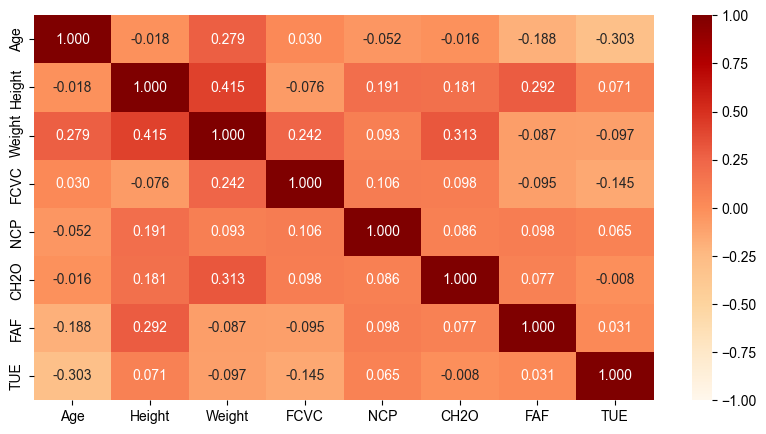

In [74]:
# 상관성 시각화

import seaborn as sns
plt.rcParams['font.family'] = 'Arial'
corr_numerical = all_df[numeric_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_numerical, annot=True, cmap="OrRd", fmt='.3f', cbar=True, vmin=-1, vmax=1)
plt.show()

범주형 변수_시각화

C:\Users\dldkr\AppData\Local\Temp\ipykernel_17688\1938181307.py:21: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
C:\Users\dldkr\AppData\Local\Temp\ipykernel_17688\1938181307.py:21: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
c:\Users\dldkr\anaconda3\envs\envFirstMini\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dldkr\anaconda3\envs\envFirstMini\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


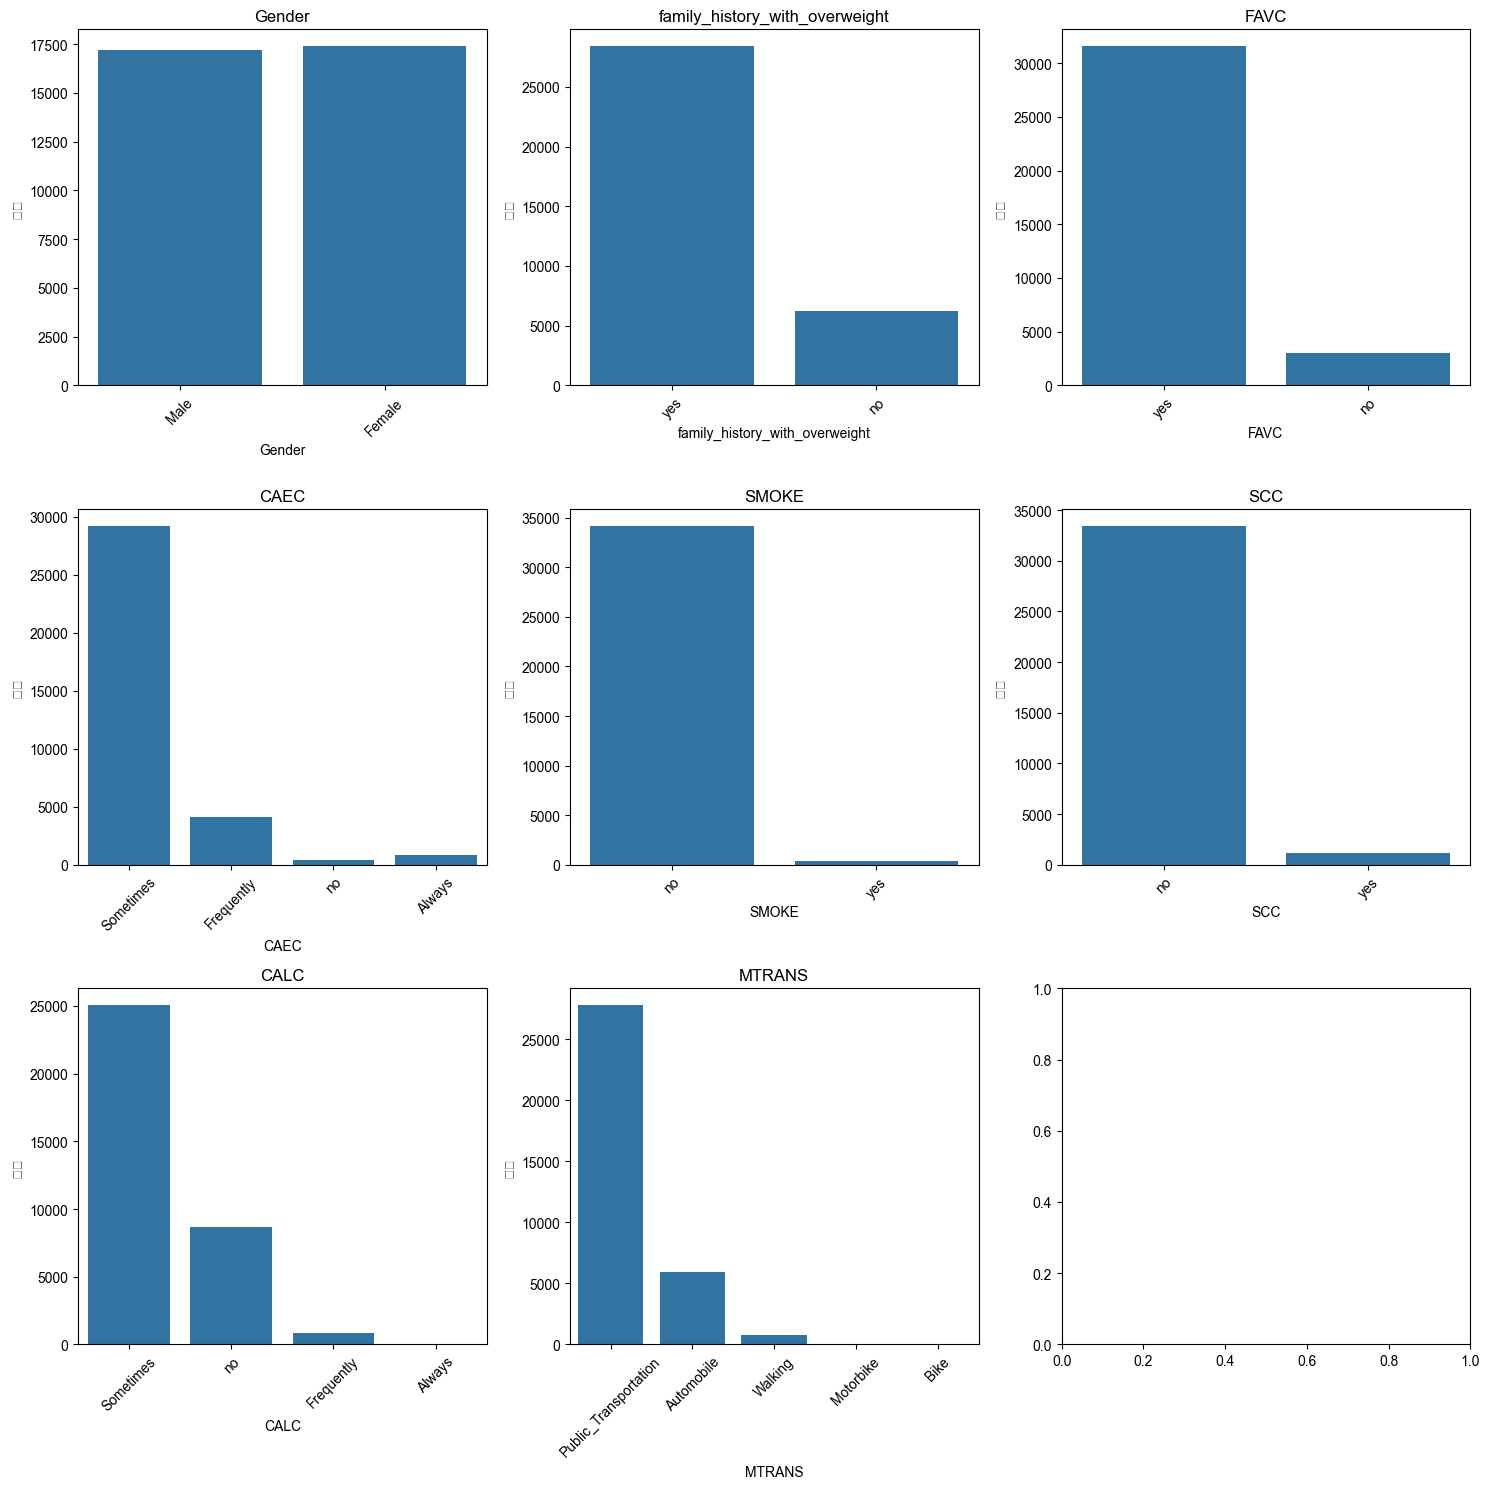

In [75]:
categorical_columns = all_df.select_dtypes(include=['object']).columns

# 다중 플롯 설정
num_plots = len(categorical_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
# plt.rcParams['font.family'] = 'Malgun Gothic'

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.countplot(data=all_df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')
    axes[row, col].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

# !!한글 깨짐 확인 & 색상 스타일 재설정

* 인코딩

In [76]:
''' 
- 원-핫 인코딩: (명목척도 인 것)
gender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)

- 라벨 인코딩: (서열척도 인 것)
caec(4), calc(3)
'''

' \n- 원-핫 인코딩: (명목척도 인 것)\ngender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)\n\n- 라벨 인코딩: (서열척도 인 것)\ncaec(4), calc(3)\n'

In [77]:
# 원-핫 인코딩
all_df = pd.get_dummies(all_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
       'SCC', 'MTRANS'], drop_first=True)
all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,Sometimes,2.763573,0.000000,0.976473,Sometimes,True,True,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,Frequently,2.000000,1.000000,1.000000,no,False,True,True,False,False,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,Sometimes,1.910378,0.866045,1.673584,no,False,True,True,False,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,Sometimes,1.674061,1.467863,0.780199,Sometimes,False,True,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,Sometimes,1.979848,1.967973,0.931721,Sometimes,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,Sometimes,1.000000,0.807076,0.778632,Sometimes,True,True,False,False,False,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,Sometimes,2.000000,0.000000,0.000000,Sometimes,False,False,True,False,False,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,Frequently,2.000000,1.949840,1.000000,Sometimes,False,False,True,False,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,Sometimes,2.000000,3.000000,2.000000,no,True,True,True,False,False,False,False,True,False


In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
# 라벨 인코딩
le_cat = ['CAEC', 'CALC']

for cat in le_cat:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == 'object':
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

CAEC
CALC


In [80]:
all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2,2.763573,0.000000,0.976473,2,True,True,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,1,2.000000,1.000000,1.000000,3,False,True,True,False,False,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,2,1.910378,0.866045,1.673584,3,False,True,True,False,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,2,1.674061,1.467863,0.780199,2,False,True,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,2,1.979848,1.967973,0.931721,2,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,2,1.000000,0.807076,0.778632,2,True,True,False,False,False,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,2,2.000000,0.000000,0.000000,2,False,False,True,False,False,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,1,2.000000,1.949840,1.000000,2,False,False,True,False,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,2,2.000000,3.000000,2.000000,3,True,True,True,False,False,False,False,True,False


In [81]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CAEC,34598.0,1.846552,0.452257,0.00,2.000000,2.000000,2.000000,3.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000
CALC,34598.0,2.225360,0.474876,0.00,2.000000,2.000000,3.000000,3.000000


* 표준화

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 34598 non-null  float64
 1   Height                              34598 non-null  float64
 2   Weight                              34598 non-null  float64
 3   FCVC                                34598 non-null  float64
 4   NCP                                 34598 non-null  float64
 5   CAEC                                34598 non-null  int32  
 6   CH2O                                34598 non-null  float64
 7   FAF                                 34598 non-null  float64
 8   TUE                                 34598 non-null  float64
 9   CALC                                34598 non-null  int32  
 10  Gender_Male                         34598 non-null  bool   
 11  family_history_with_overweight_yes  34598

In [84]:
# 데이터프레임에서 수치형 변수 추출
numerical_columns = all_df.select_dtypes(include=['float64']).columns
numerical_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [85]:
# StandardScaler 객체 생성
scaler = StandardScaler()
all_df[numerical_columns]= scaler.fit_transform(all_df[numerical_columns])
all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,2,1.202683,-1.166547,0.598886,2,True,True,True,False,False,False,False,True,False
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,1,-0.049985,0.025192,0.637808,3,False,True,True,False,False,False,False,False,False
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,2,-0.197013,-0.134447,1.752153,3,False,True,True,False,False,False,False,True,False
3,-0.511666,0.125258,1.659050,1.042690,0.343353,2,-0.584699,0.582763,0.274179,2,False,True,True,False,False,False,False,True,False
4,1.352648,2.440044,0.232618,0.441189,-1.110191,2,-0.083045,1.178764,0.524850,2,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,-0.097389,0.246472,-0.367527,0.691996,0.343353,2,-1.690520,-0.204723,0.271587,2,True,True,False,False,False,False,False,True,False
34594,0.891978,-1.248327,-0.977671,1.042690,0.343353,2,-0.049985,-1.166547,-1.016544,2,False,False,True,False,False,False,False,True,False
34595,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,1,-0.049985,1.157154,0.637808,2,False,False,True,False,False,False,False,True,False
34596,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,2,-0.049985,2.408672,2.292160,3,True,True,True,False,False,False,False,True,False


In [86]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,8.379139e-17,1.000014,-1.724397,-0.677847,-0.180431,0.368703,6.473577
Height,34598.0,-5.770926e-17,1.000014,-2.841154,-0.772118,0.003179,0.705991,3.188832
Weight,34598.0,-2.330961e-17,1.000014,-1.853090,-0.825424,-0.140313,0.907888,2.944867
FCVC,34598.0,-2.873141e-16,1.000014,-2.712750,-0.835030,-0.098628,1.042690,1.042690
NCP,34598.0,6.074875e-16,1.000014,-2.483103,0.343353,0.343353,0.343353,1.756581
CAEC,34598.0,1.846552e+00,0.452257,0.000000,2.000000,2.000000,2.000000,3.000000
CH2O,34598.0,-7.136644e-16,1.000014,-1.690520,-0.403176,-0.049985,0.853244,1.590550
FAF,34598.0,-1.887360e-16,1.000014,-1.166547,-1.158333,0.025192,0.720968,2.408672
TUE,34598.0,-1.015560e-16,1.000014,-1.016544,-1.016544,-0.097401,0.637808,2.292160
CALC,34598.0,2.225360e+00,0.474876,0.000000,2.000000,2.000000,3.000000,3.000000


* 데이터 분할

In [87]:
all_df[:20758] # train_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,2,1.202683,-1.166547,0.598886,2,True,True,True,False,False,False,False,True,False
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,1,-0.049985,0.025192,0.637808,3,False,True,True,False,False,False,False,False,False
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,2,-0.197013,-0.134447,1.752153,3,False,True,True,False,False,False,False,True,False
3,-0.511666,0.125258,1.659050,1.042690,0.343353,2,-0.584699,0.582763,0.274179,2,False,True,True,False,False,False,False,True,False
4,1.352648,2.440044,0.232618,0.441189,-1.110191,2,-0.083045,1.178764,0.524850,2,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.218189,0.761205,1.008660,0.891692,0.343353,2,0.199063,0.419085,-0.691167,2,True,True,True,False,False,False,False,True,False
20754,-1.026697,0.116953,-1.434411,1.042690,1.756581,1,-1.690520,1.216932,0.637808,2,True,False,True,False,False,False,False,True,False
20755,-0.660226,1.363419,0.681078,-0.069264,0.343353,2,-0.049985,0.213535,0.966096,3,True,True,True,False,False,False,False,True,False
20756,1.738454,0.003179,-0.158578,0.425367,-1.110191,2,0.187627,-1.166547,0.594520,3,True,True,True,False,False,False,False,False,False


In [88]:
# 다시 학습데이터와 테스트 데이터로 되돌리기

X_features = all_df[:20758]
y_label = train['NObeyesdad']

X_sub = all_df[20758:] # 제출용 X값

In [89]:
# 목적변수 라벨인코딩
le = LabelEncoder()
le = le.fit(y_label)

y_label = le.transform(y_label)
y_label

array([6, 1, 0, ..., 3, 6, 3])

In [90]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=42)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [91]:
# pip install xgboost

In [92]:
# pip install optuna

-----

In [27]:
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import scipy.stats as stats
import optuna
from optuna.samplers import TPESampler45  # TPESampler45 오류남.

c:\Users\dldkr\anaconda3\envs\envFirstMini\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
# X = train_X
# y = train_Y
# X_test = test_X
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Assuming num_classes is the number of unique classes in your target variable
num_classes = len(set(y_tr))

def objective(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'n_estimators': 1000,
        'objective': 'multi:softprob',
        'num_class': num_classes,
        'eval_metric': 'mlogloss',
        'random_state': 42,
        'nthread': -1
    }
    
    clf = xgb.XGBClassifier(**params)
    
    # Perform cross-validation
    scores = cross_val_score(clf, X_tr, y_tr, cv=5, scoring='neg_log_loss')
    return -scores.mean()  # Minimize negative log loss

# Define study object and optimize
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
print("Best params:", best_params)

[I 2024-02-14 09:53:26,304] A new study created in memory with name: no-name-4cfae774-f11b-4337-8955-d49c3a83fe79
C:\Users\SJH\AppData\Local\Temp\ipykernel_11204\1487533588.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\SJH\AppData\Local\Temp\ipykernel_11204\1487533588.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 0.1, 10),
C:\Users\SJH\AppData\Local\Temp\ipykernel_11204\1487533588.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/op

KeyboardInterrupt: 

In [32]:
xgb_best_params ={
     'learning_rate': 0.08947338009150452, 
     'n_estimators': 270, 
     'max_depth': 17, 
     'min_child_weight': 12.507263379265952, 
     'gamma': 0.0001310530089491284, 
     'colsample_bytree': 0.4573028240080267, 
     'subsample': 0.7133446093779373, 
     'reg_alpha': 1.7718245007518365, 
     'reg_lambda': 0.006664776629837565
}
xgb_best_params["objective"] = "multi:softprob"
xgb_best_params["eval_metric"] = 'mlogloss'
xgb_best_params["early_stopping_rounds"] = 50
xgb_best_params["nthread"] = -1
xgb_best_params["random_state"] = 42

In [33]:
study_best.head()

NameError: name 'study_best' is not defined

In [34]:
optuna.visualization.plot_param_importances(study)

NameError: name 'study' is not defined

--- 

In [94]:
from sklearn.metrics import classification_report

In [96]:
# 최적 파라미터 설정 후, 모델 학습및 예측

import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

xgb_best_params = {
    'learning_rate': 0.08947338009150452,
    'n_estimators': 270,
    'max_depth': 17,
    'min_child_weight': 12.507263379265952,
    'gamma': 0.0001310530089491284,
    'colsample_bytree': 0.4573028240080267,
    'subsample': 0.7133446093779373,
    'reg_alpha': 1.7718245007518365,
    'reg_lambda': 0.006664776629837565,
    'objective': "multi:softprob",
    'eval_metric': 'mlogloss',
    'nthread': -1,
    'random_state': 42
}


xgb_model = XGBClassifier(**xgb_best_params)
xgb_model.fit(X_tr, y_tr, early_stopping_rounds=10, eval_set=[(X_val, y_val)], verbose=True)


print(classification_report(y_test, xgb_model.predict(X_test))) # 테스트 데이터로 정확도 확인
 

[0]	validation_0-mlogloss:1.78099


[1]	validation_0-mlogloss:1.64984
[2]	validation_0-mlogloss:1.54330
[3]	validation_0-mlogloss:1.44113
[4]	validation_0-mlogloss:1.36294
[5]	validation_0-mlogloss:1.27267


c:\Users\dldkr\anaconda3\envs\envFirstMini\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-mlogloss:1.19702
[7]	validation_0-mlogloss:1.14071
[8]	validation_0-mlogloss:1.08553
[9]	validation_0-mlogloss:1.04833
[10]	validation_0-mlogloss:0.99361
[11]	validation_0-mlogloss:0.94993
[12]	validation_0-mlogloss:0.90192
[13]	validation_0-mlogloss:0.86662
[14]	validation_0-mlogloss:0.84076
[15]	validation_0-mlogloss:0.80863
[16]	validation_0-mlogloss:0.77966
[17]	validation_0-mlogloss:0.75267
[18]	validation_0-mlogloss:0.72357
[19]	validation_0-mlogloss:0.69335
[20]	validation_0-mlogloss:0.67431
[21]	validation_0-mlogloss:0.65183
[22]	validation_0-mlogloss:0.63078
[23]	validation_0-mlogloss:0.61363
[24]	validation_0-mlogloss:0.59446
[25]	validation_0-mlogloss:0.57584
[26]	validation_0-mlogloss:0.56440
[27]	validation_0-mlogloss:0.54558
[28]	validation_0-mlogloss:0.53449
[29]	validation_0-mlogloss:0.51918
[30]	validation_0-mlogloss:0.50769
[31]	validation_0-mlogloss:0.49667
[32]	validation_0-mlogloss:0.48514
[33]	validation_0-mlogloss:0.47367
[34]	validation_0-mloglo

In [97]:
Y_PRED = xgb_model.predict(X_sub)
Y_PRED_decoded = le.inverse_transform(Y_PRED) # 디코딩

# 'id' 컬럼과 예측된 클래스를 가진 DataFrame 생성
final_df = pd.DataFrame({'id': test['id'], 'NObeyesdad': Y_PRED_decoded})

final_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [ ]:
# final_df.to_csv('../csv/submission_xgboost.csv')